In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, precision_score,\
    classification_report, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn import svm
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import precision_recall_curve
from numpy import argmax
import data_cleaning as dc
import importlib

In [37]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [38]:
importlib.reload(dc)
split_size = 0.2
balanced = True
show_number_of_data=True
X_train, X_test, y_train, y_test = dc.choose_data(balanced, split_size,show_number_of_data)

Train data: 81640
Test data: 16800


In [39]:
model = svm.SVC(kernel='rbf', verbose=True)
# linear kernel - 56% f1_score, 84% accuracy
# poly kernel - 57% f1_score, 85% accuracy
# rbf kernel - 57% f1_score, 85% accuracy
# sigmoid kernel - 25% f1_score, 62% accuracy
# winner - poly & rbf
model.fit(X_train, y_train)

SVC()

In [40]:
y_pred = model.predict(X_test)
fpr_org, tpr_org, _ = roc_curve(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)

print('\nACC-org :', round(accuracy_score(y_test, y_pred), 3))
print('AUC-org :', round(auc(fpr_org, tpr_org), 3))
print('G-mean-org :', round(geometric_mean_score(y_test, y_pred.ravel()), 3))
print('F1-org :', round(f1_score(y_test, y_pred), 3))
print('Sens-org :', round(cm[1,1]/(cm[1,0]+cm[1,1]), 3))
print('Spec-org :', round(cm[0,0]/(cm[0,0]+cm[0,1]), 3))
print('Prec-org :', round(precision_score(y_test, y_pred), 3))
print('\nConfusion matrix\n', confusion_matrix(y_test, y_pred))


ACC-org : 0.847
AUC-org : 0.744
G-mean-org : 0.726
F1-org : 0.582
Sens-org : 0.582
Spec-org : 0.907
Prec-org : 0.581

Confusion matrix
 [[12454  1283]
 [ 1281  1782]]


In [41]:
print('\nReport: \n', classification_report(y_test, y_pred))


Report: 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     13737
           1       0.58      0.58      0.58      3063

    accuracy                           0.85     16800
   macro avg       0.74      0.74      0.74     16800
weighted avg       0.85      0.85      0.85     16800



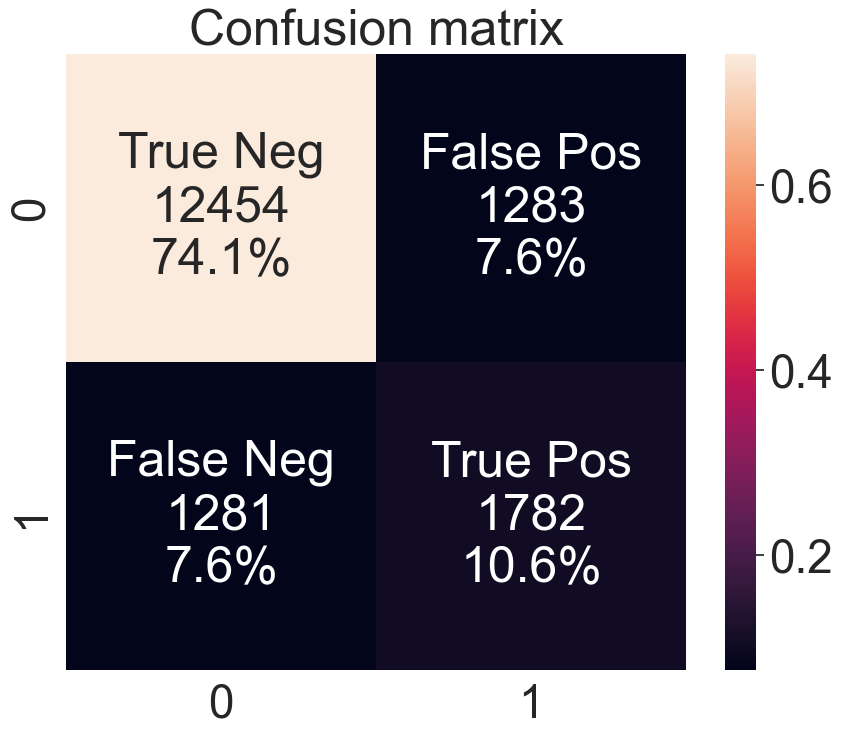

In [42]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(cm/np.sum(cm), annot=labels,
            fmt='')
sns.set(font_scale=3)
ax.set_title('Confusion matrix')
plt.show()